In this code we want to analyse relationship between robusstness and core-periphery structure.

In [ ]:
# Import the neccessary packages
import networkx as nx
from matplotlib import pyplot as plt # import matplotlib
import numpy as np
from scipy.io import mmread
import random

Generate a core-periphery network using adapted Erdos-Renyi model

In [ ]:
# Adapted ER
def core_periphery_network(core_size, periphery_size, p_core, p_periphery, p_between):
    # Create an empty graph
    G = nx.Graph()

    # Add core nodes
    core_nodes = range(core_size)
    G.add_nodes_from(core_nodes)

    # Add periphery nodes
    periphery_nodes = range(core_size, core_size + periphery_size)
    G.add_nodes_from(periphery_nodes)

    # Add edges within the core
    for i in core_nodes:
        for j in core_nodes:
            if i < j and np.random.rand() < p_core:
                G.add_edge(i, j)

    # Add edges within the periphery
    for i in periphery_nodes:
        for j in periphery_nodes:
            if i < j and np.random.rand() < p_periphery:
                G.add_edge(i, j)

    # Add edges between core and periphery
    for i in core_nodes:
        for j in periphery_nodes:
            if np.random.rand() < p_between:
                G.add_edge(i, j)

    return G

In [ ]:
# Parameters
core_size = 10            # Number of core nodes
periphery_size = 30       # Number of periphery nodes
p_core = 0.7              # Probability of edge within core
p_periphery = 0.08        # Probability of edge within periphery
p_between = 0.2           # Probability of edge between core and periphery

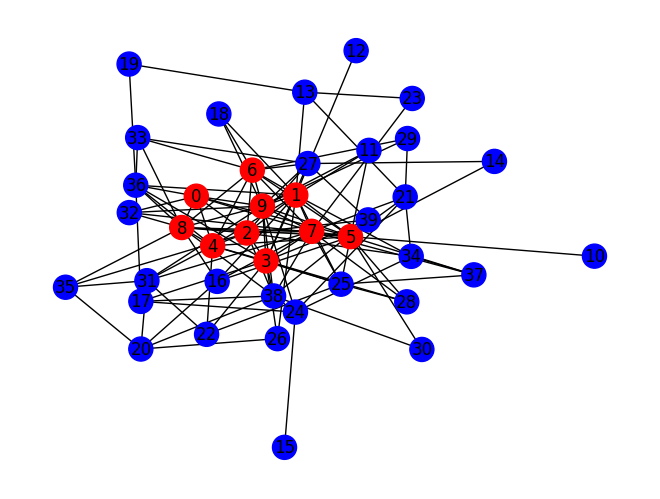

In [ ]:
random.seed(1)
# Generate the network
G = core_periphery_network(core_size, periphery_size, p_core, p_periphery, p_between)

# Draw the network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=['red' if i < core_size else 'blue' for i in G.nodes()])
plt.show()

In [ ]:
# compute Borgatti-Everett score

def borgatti_everett_score(G,core_size,periphery_size):
  A = nx.adjacency_matrix(G)
  p = 2*G.number_of_edges()/(G.number_of_nodes()*(G.number_of_nodes()-1))
  return (A[core_size:core_size + periphery_size, core_size:core_size + periphery_size].sum()-p)/2

In [ ]:
# compute robustness with Schneider method R = (1/N)*sum_{q=1}^{N}s'(q) where s'(q)=s(q)/(N-1) with s(q) size of largest component after removing q nodes

def schneider_robustness_index(G, centrality_func): # Compute the Schneider robustness index of the graph G using sequential node removal.
    G_copy = G.copy()  # Create a copy to avoid modifying the original graph
    num_nodes = G_copy.number_of_nodes()

    # Initialize robustness measure
    robustness_measure = 0

    # Initial computation of centrality
    centrality = centrality_func(G_copy)

    # Sort nodes by centrality
    sorted_nodes = sorted(centrality, key=centrality.get, reverse=True)

    for node in sorted_nodes:
      # Remove node with highest importance
      G_copy.remove_node(node)

      # Compute the size of the largest connected component
      if G_copy.number_of_nodes() > 0:
        largest_component_size = len(max(nx.connected_components(G_copy), key=len))
      else:
        largest_component_size = 0

      # Add to robustness measure
      robustness_measure += largest_component_size / (num_nodes - 1)

    # Normalize the robustness measure
    robustness_index = robustness_measure / num_nodes

    return robustness_index

In [ ]:
def simulation_core_periphery_robustness(G,n_iterations,core_size,periphery_size,centrality_func):
  G_copy = G.copy()
  core_periphery_score = np.zeros(n_iterations)
  robustness_score = np.zeros(n_iterations)
  for i in range(n_iterations):
    u,v = random.sample(G_copy.edges(),1)[0] # Sample one edge without replacement
    G_copy.remove_edge(u,v)
    flag = 1
    while(flag):
      u_i, v_i = random.sample(G_copy.nodes(),2) # Sample two nodes without replacement
      if G_copy.has_edge(u_i, v_i)==0:
        G_copy.add_edge(u_i, v_i)
        flag = 0
    core_periphery_score[i] = borgatti_everett_score(G_copy,core_size,periphery_size)
    robustness_score[i] = schneider_robustness_index(G_copy,centrality_func)
  return core_periphery_score, robustness_score

<ipython-input-45-1c6e214ccc23>:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  u,v = random.sample(G_copy.edges(),1)[0] # Sample one edge without replacement
<ipython-input-45-1c6e214ccc23>:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  u_i, v_i = random.sample(G_copy.nodes(),2) # Sample two nodes without replacement


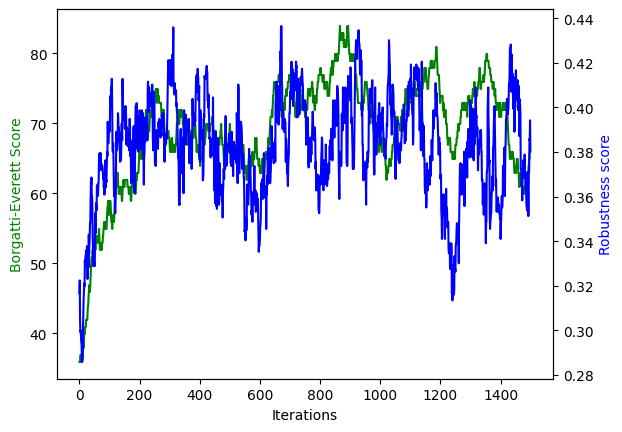

In [ ]:
# degree centrality
random.seed(1)
m = 1500
core_periphery_score, robustness_score_centrality = simulation_core_periphery_robustness(G,m,core_size,periphery_size,nx.degree_centrality)
# plot
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(core_periphery_score, 'g-')
ax2.plot(robustness_score_centrality, 'b-')

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Borgatti-Everett Score', color='g')
ax2.set_ylabel('Robustness score', color='b')

plt.show()

<ipython-input-45-1c6e214ccc23>:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  u,v = random.sample(G_copy.edges(),1)[0] # Sample one edge without replacement
<ipython-input-45-1c6e214ccc23>:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  u_i, v_i = random.sample(G_copy.nodes(),2) # Sample two nodes without replacement


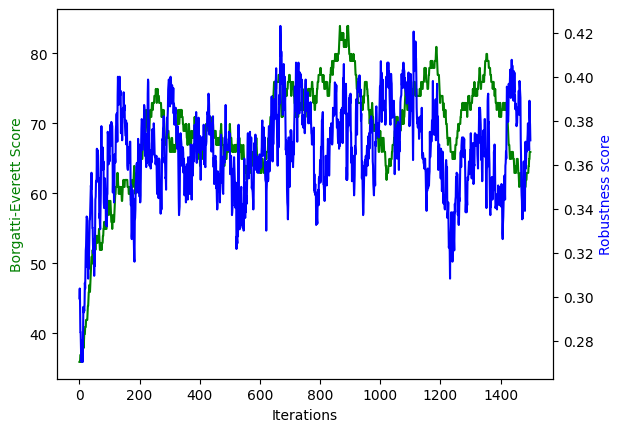

In [ ]:
# betweenness centrality
random.seed(1)
m = 1500
core_periphery_score, robustness_score_centrality = simulation_core_periphery_robustness(G,m,core_size,periphery_size,nx.betweenness_centrality)
# plot
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(core_periphery_score, 'g-')
ax2.plot(robustness_score_centrality, 'b-')

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Borgatti-Everett Score', color='g')
ax2.set_ylabel('Robustness score', color='b')

plt.show()

<ipython-input-45-1c6e214ccc23>:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  u,v = random.sample(G_copy.edges(),1)[0] # Sample one edge without replacement
<ipython-input-45-1c6e214ccc23>:10: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  u_i, v_i = random.sample(G_copy.nodes(),2) # Sample two nodes without replacement


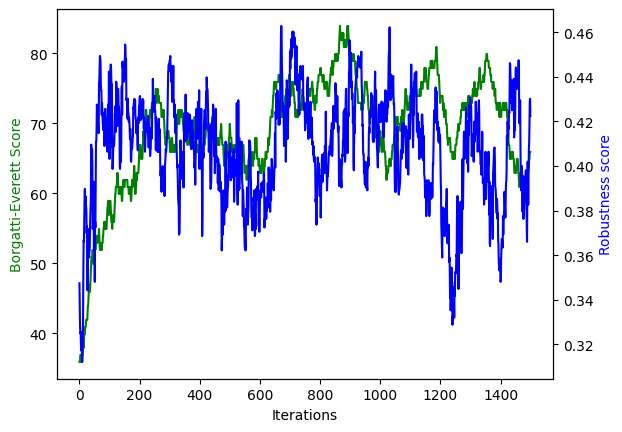

In [ ]:
# Katz centrality
random.seed(1)
m = 1500
core_periphery_score, robustness_score_centrality = simulation_core_periphery_robustness(G,m,core_size,periphery_size,nx.katz_centrality)
# plot
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(core_periphery_score, 'g-')
ax2.plot(robustness_score_centrality, 'b-')

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Borgatti-Everett Score', color='g')
ax2.set_ylabel('Robustness score', color='b')

plt.show()